In [3]:
import sys
sys.path.append('../src')
from numpy import *
from numpy import random
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,mark_inset)
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from Params import *
from NeutrinoFuncs import *
from WIMPFuncs import *
from PlotFuncs import *
from LabFuncs import *
import cmocean
import shlex
import subprocess
import pprint
import os

plt.rcParams['axes.linewidth'] = 2.5
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=30)
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{mathpazo}']

Nuc = Ar40
m_chi = 5000.0
name = 'Argon'

# Nuc = Xe131
# m_chi = 100.0
# name = 'Xenon'


fname = mylimit_dir+'DL1D_'+Nuc.Name+'_'+str(int(m_chi))+'GeV'
lim = loadtxt(fname)
sig = lim[1:,1:]
ferrs = lim[1:,0]
ex_vals = lim[0,1:]
n_ex = size(ex_vals)
nerrs = size(ferrs)  

N = ex_vals*R_AtmNu(4.0,200.0,Nuc=Nuc)

pltname = 'NuFloor1D_'+Nuc.Name+'_'+str(int(m_chi))+'GeV_withUncertainties'

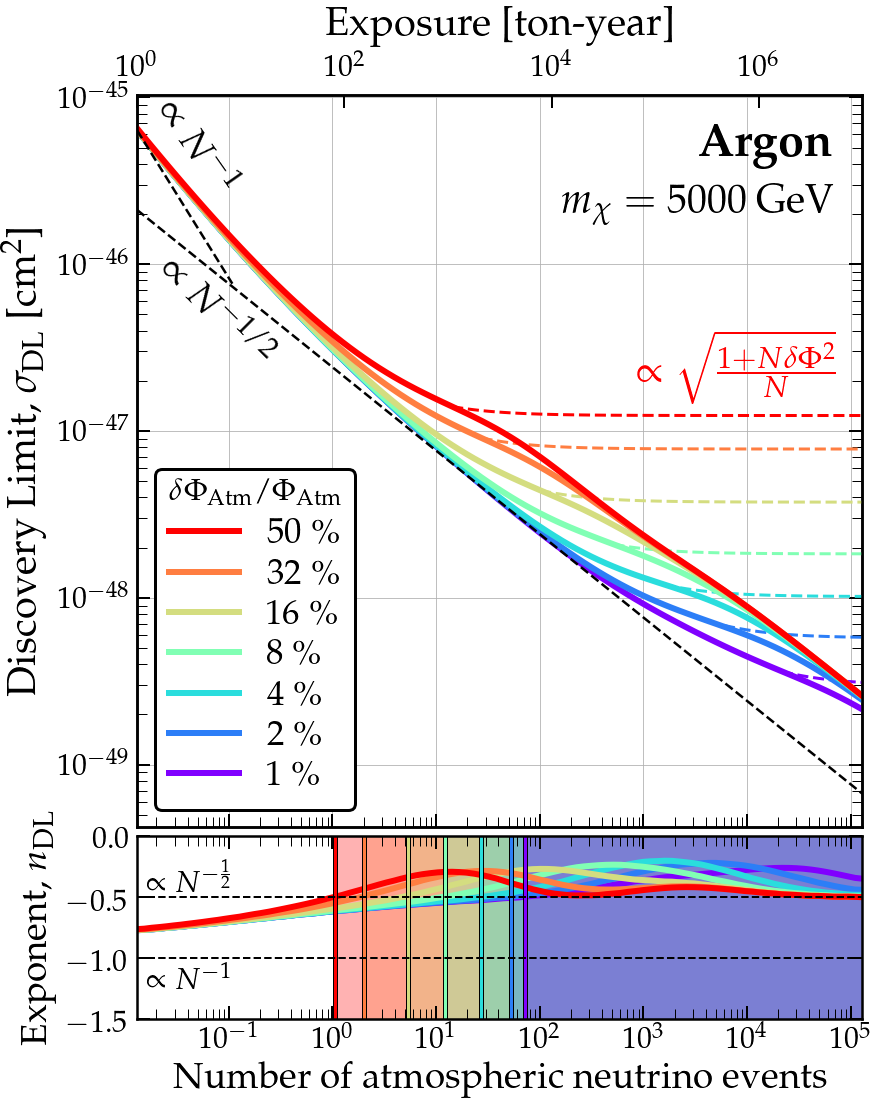

In [7]:
col = cm.rainbow(linspace(0,1,nerrs))

# Set up subplots
fig, axarr = plt.subplots(2, 1,figsize=(13,17))
gs = gridspec.GridSpec(2, 1,width_ratios=[1],height_ratios=[4,1])
gs.update(hspace=0.02)
ax_top = plt.subplot(gs[0])
ax_bottom = plt.subplot(gs[1])

ylab = r"Discovery Limit, $\sigma_{\rm DL}$ [cm$^2$]"

ymin = 1.1e-49
ymax = 1.0e-45

##### Top plot
# Labels
#ax1.set_xlabel(r"Number of neutrino events",fontsize=35)
ax_top.set_ylabel(ylab,fontsize=40)
ax_top.set_xlim([N[0],N[-1]])

# Top axis
ax2 = ax_top.twiny()  # instantiate a second axes that shares the same x-axis
ax2.set_xlabel(r'Exposure [ton-year]',fontsize=40,labelpad=20)  # we already handled the x-label with ax1
ax2.set_xlim([ex_vals[0],ex_vals[-1]])

#imeet = 40
#i1 = 40
zo = 0
for i in flipud(range(0,nerrs)):
    ax2.loglog(ex_vals,sig[i,:],'-',linewidth=6,color=col[i,:],label=str(int(ferrs[i]))+r' \%',zorder=zo)

    dEx = gradient(log10(sig[i,:]))/gradient(log10(N))
    i1 = argmax(dEx)
    sig_dphi = sqrt((1+N*(ferrs[i]/100)**2.0)/N)
    ax2.loglog(ex_vals[i1:],sig_dphi[i1:]*(sig[i,i1]/sig_dphi[i1]),'--',linewidth=3,color=col[i,:],zorder=zo)
    zo = zo-1
    if i == nerrs-1:
        plt.text(ex_vals[-2]/1.5,1.3*sig_dphi[-2]*(sig[i,i1]/sig_dphi[i1]),r'$\propto \sqrt{\frac{1+N\delta\Phi^2}{N}}$',fontsize=40,color=col[-1,:],horizontalalignment='right')
plt.gcf().text(0.87,0.83,r'{\bf '+ name+'}',fontsize=47,horizontalalignment='right')
plt.gcf().text(0.87,0.78,r'$m_\chi = $ '+str(int(m_chi))+' GeV',fontsize=40,horizontalalignment='right')

Ex0 = ex_vals[0]
sig0 = sig[i,0]
sig_half = (sig0/3.)*(ex_vals/Ex0)**-0.5
sig_1 = sig0*(ex_vals/Ex0)**-1.0

ax2.loglog(ex_vals[sig_half<sig_1],sig_1[sig_half<sig_1],'k--',linewidth=2.5)
plt.text(ex_vals[1]*1.1,sig_1[1]/2,r'$\propto N^{-1}$',fontsize=38,rotation=-55)
ax2.loglog(ex_vals,sig_half,'k--',linewidth=2.5)
plt.text(ex_vals[2],sig_half[2]/1.5,r'$\propto N^{-1/2}$',fontsize=38,rotation=-45,verticalalignment='top',horizontalalignment='left')

# Style
ax_top.grid()
#ax2.grid()
ax_top.set_yscale('log')
ax_top.set_xscale('log')
ax2.set_xscale('log')
#ax_top.set_ylim(bottom=ymin, top=ymax)
ax_top.tick_params(which='major',direction='in',width=2,length=13,right=True,top=False,pad=8)
ax_top.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=False)
ax2.tick_params(which='major',direction='in',width=2,length=13,bottom=False,top=True,pad=10)
ax2.tick_params(which='minor',direction='in',width=1,length=10,bottom=False,top=True)

# legend
leglab = r'$\delta \Phi_{\rm Atm}/\Phi_{\rm Atm}$'
leg1 = ax2.legend(fontsize=35,frameon=True,loc="lower left",framealpha=1,title=leglab,labelspacing=0.1)
leg1.get_frame().set_linewidth(3)
leg1.get_frame().set_edgecolor("k")

# turn of x-tick labels
labels = [item.get_text() for item in ax_top.get_xticklabels()]
empty_string_labels = ['']*len(labels)
ax_top.set_xticklabels(empty_string_labels)




#### Bottom plot

ymin = -1.5
ymax = 0.0

# Labels
ax_bottom.set_xlabel(r"Number of atmospheric neutrino events",fontsize=37)
ax_bottom.set_ylabel(r"Exponent, $n_{\rm DL}$",fontsize=37)
ax_bottom.set_xlim([N[0],N[-1]])

# Top axis
for i in range(0,nerrs):
    dEx = gradient(log10(sig[i,:]))/gradient(log10(ex_vals))
    ax_bottom.plot(N,dEx,'-',linewidth=6,color=col[i,:],label=str(int(ferrs[i]*100))+r' \%')

for i in range(0,nerrs):
    dEx = gradient(log10(sig[nerrs-1-i,:]))/gradient(log10(N))    
    floor = N[dEx>-0.5]
    floor0 = floor[0]
    ax_bottom.plot([floor0,floor0],[ymin,ymax],'-',color='k',lw=5)
    ax_bottom.plot([floor0,floor0],[ymin,ymax],'-',color=col[nerrs-1-i,:],lw=3)
    ax_bottom.fill_between([floor0,N[-1]],[0.0,0.0],y2=ymin,color=col[nerrs-1-i,:],alpha=0.3)
    
ax_bottom.plot([N[0],N[-1]],[-0.5,-0.5],'k--',linewidth=2)  
plt.gcf().text(0.135,0.23,r'$\propto N^{-\frac{1}{2}}$',fontsize=30)
ax_bottom.plot([N[0],N[-1]],[-1.0,-1.0],'k--',linewidth=2)  
plt.gcf().text(0.135,0.15,r'$\propto N^{-1}$',fontsize=30)

# Style
ax_bottom.set_xscale('log')
ax_bottom.set_ylim(bottom=ymin, top=ymax)
ax_bottom.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=8)
ax_bottom.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)




plt.show()
MySaveFig(fig,pltname)

In [121]:
n_ex = size(ex_vals)
dEx = gradient(log10(sig[nerrs-1-i,:]))/gradient(log10(N))
i1 = arange(0,n_ex)[dEx>-0.5][0]

In [122]:
floor

47